# プロットと可視化

In [2]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [3]:
%matplotlib inline

In [4]:
%pwd

'/Users/miyamoto/Projects/sample/pydata-book'

# functools.partial

In [5]:
def add(x, y):
    return x + y
import functools
add_1 = functools.partial(add, 1) #引数１を固定して関数を作成
print(add_1(1))
print(add_1(2))

2
3


In [6]:
import itertools
g = itertools.count() #整数をインクリメントしながら順番に返すイテレータを返す。
print(next(g))
print(next(g))

0
1


In [7]:
callable = functools.partial(next, g) #こう書ける
print(callable())
print(callable())

2
3


In [10]:
ite = iter(callable, 10)
print(list(ite))

[4, 5, 6, 7, 8, 9]


# numpy.recarray

In [16]:
x = np.array([(1.0, 2), (3.0, 4)], dtype=[('x', float), ('y', int)])
x

array([( 1., 2), ( 3., 4)],
      dtype=[('x', '<f8'), ('y', '<i8')])

In [14]:
x['x']

array([ 1.,  3.])

In [17]:
x.x

AttributeError: 'numpy.ndarray' object has no attribute 'x'

## Pythonの内包表記はなぜ速い？

参考：http://dsas.blog.klab.org/archives/51742727.html
インタプリタが解釈する命令数が減る、属性の取り出しが不要になる、関数呼び出しが不要になる、という3つの理由で、リスト内包表記を使うと速くなります。

In [19]:
def sample_loop(n):
    L = []
    for i in range(n):
        L.append(i)
    return L

def sample_comprehension(n):
    return [i for i in range(n)]

%timeit sample_loop(10000)
%timeit sample_comprehension(10000)

1.05 ms ± 86.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
450 µs ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
from dis import dis
print(dis(sample_loop))
print("----------------------")
print(dis(sample_comprehension))

  2           0 BUILD_LIST               0
              3 STORE_FAST               1 (L)

  3           6 SETUP_LOOP              33 (to 42)
              9 LOAD_GLOBAL              0 (range)
             12 LOAD_FAST                0 (n)
             15 CALL_FUNCTION            1 (1 positional, 0 keyword pair)
             18 GET_ITER
        >>   19 FOR_ITER                19 (to 41)
             22 STORE_FAST               2 (i)

  4          25 LOAD_FAST                1 (L)
             28 LOAD_ATTR                1 (append)
             31 LOAD_FAST                2 (i)
             34 CALL_FUNCTION            1 (1 positional, 0 keyword pair)
             37 POP_TOP
             38 JUMP_ABSOLUTE           19
        >>   41 POP_BLOCK

  5     >>   42 LOAD_FAST                1 (L)
             45 RETURN_VALUE
None
----------------------
  8           0 LOAD_CONST               1 (<code object <listcomp> at 0x106887d20, file "<ipython-input-19-df6c0a1ca15a>", line 8>)
           

In [ ]:
from dis import dis
print(dis(sample_loop))
print("----------------------")
print(dis(sample_comprehension))

In [25]:
print(sample_loop.__code__)

<code object sample_loop at 0x106887db0, file "<ipython-input-19-df6c0a1ca15a>", line 1>


## 簡単なmatplotlib API入門

In [4]:
import matplotlib.pyplot as plt

### 図とサブプロット

In [5]:
#Figureインスタンスは、描画全体の領域を確保する。

In [12]:
fig = plt.figure()

In [13]:
#add_subplotでsubplotの追加
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot([1,2,3,4])

In [14]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

## plt.subplot

In [10]:
#現在の描画領域(fig = figure()のこと)に追加するメソッド

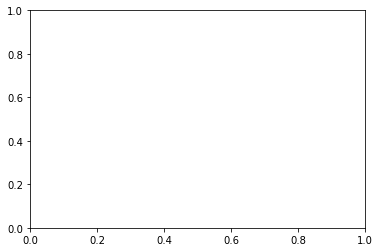

In [17]:
plt.subplot(111) #1個表示

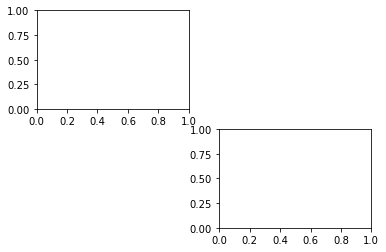

In [18]:
plt.subplot(221) #2 * 2グリッドの１個目を表示
plt.subplot(224) #2 * 2グリッドの4個目を表示

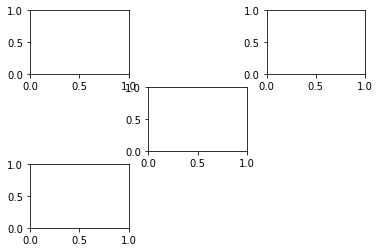

In [19]:
plt.subplot(3,3,1)
plt.subplot(3,3,3)
plt.subplot(3,3,5)
plt.subplot(3,3,7)

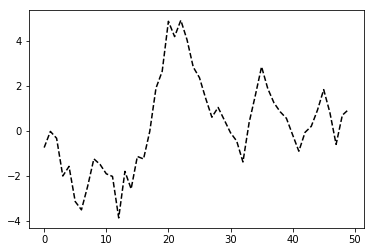

In [22]:
from numpy.random import randn
#randnでランダムデータ生成し、cumsumで累積和
plt.plot(randn(50).cumsum(), 'k--')

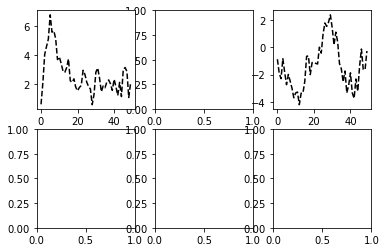

In [29]:
fig, axes = plt.subplots(2, 3)
#１個目
plt.subplot(231)
plt.plot(randn(50).cumsum(), 'k--')
#3個目
plt.subplot(233)
plt.plot(randn(50).cumsum(), 'k--')

[]

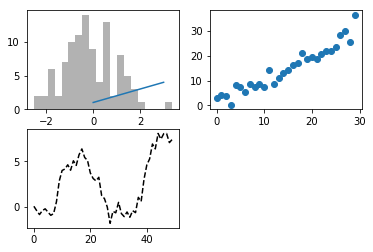

In [50]:
#subplotをまとめて plotしてる
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot([1,2,3,4])
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(randn(50).cumsum(), 'k--')
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

# plt.subplots()
plt.plot()

[]

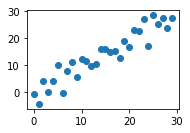

In [57]:
#subplotのみで表示
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
# plt.plot()

In [60]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115759ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112d1a048>]], dtype=object)

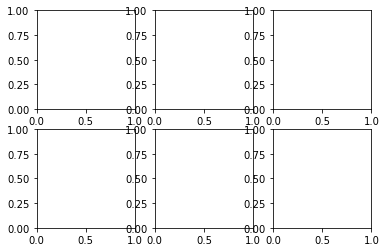

In [61]:
fig, axes = plt.subplots(2, 3) #重なってる
axes

### サブプロット周辺の間隔を調整する

In [62]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

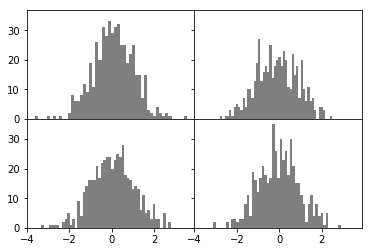

In [63]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

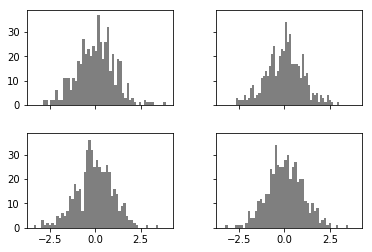

In [67]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.3, hspace=0.3) #0.3空けた

### 色、マーカー、線のスタイル

In [68]:
plt.figure()

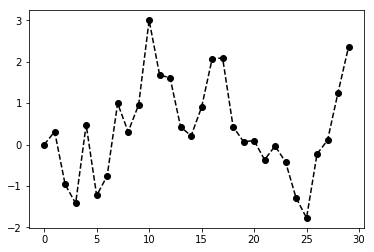

In [70]:
plt.plot(randn(30).cumsum(), 'ko--')

In [71]:
plt.close('all')

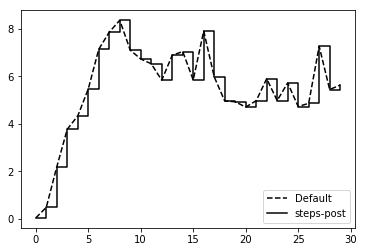

In [72]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### 目盛り、ラベル、凡例

#### タイトル、軸ラベル（axis labels）, 目盛り（ticks）、目盛りラベルの設定

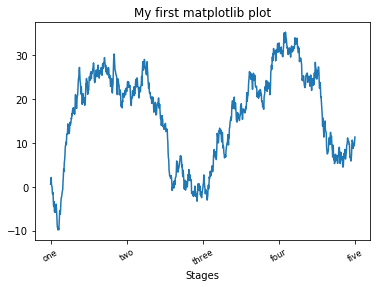

In [81]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000]) #set_xticksで設定した場所に、set_xticklabelsの値を表示
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### 凡例追加

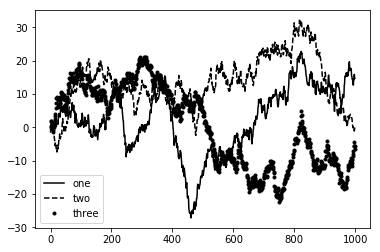

In [86]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one') #label
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best') #labelを追加したらlegendで表示できる


### 注釈やサブプロットの描画

In [12]:
from datetime import datetime
data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
data.head(5)

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


(5472, 1)


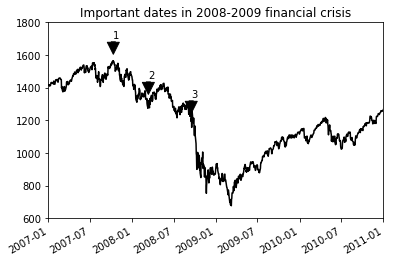

In [5]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
print(data.shape)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

#ここに注釈をつける
crisis_data = [
    (datetime(2007, 10, 11), u'1'),
    (datetime(2008, 3, 12), u'2'),
    (datetime(2008, 9, 15), u'3')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

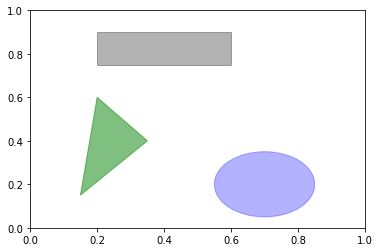

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5) #ポリゴン

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### plotsをファイルに保存

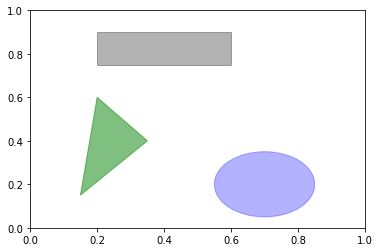

In [7]:
fig

In [8]:
fig.savefig('figpath.svg')

In [9]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [10]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib configuration

In [11]:
plt.rc('figure', figsize=(10, 10))

## Plotting functions in pandas

### Line plots

In [34]:
plt.close('all')

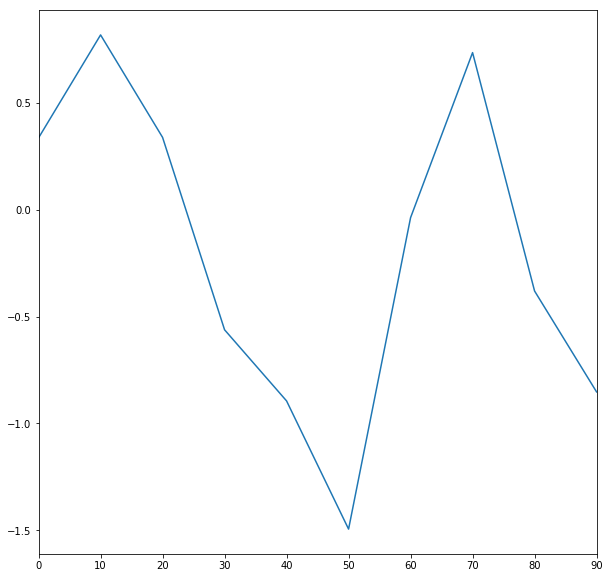

In [35]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

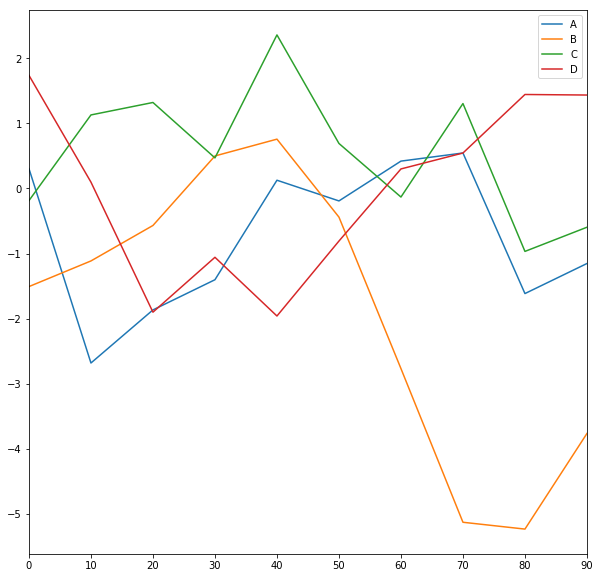

In [36]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

### Bar plots

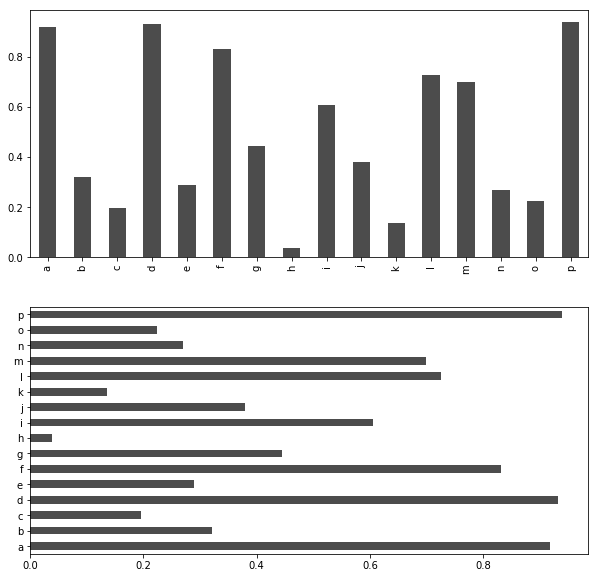

In [37]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

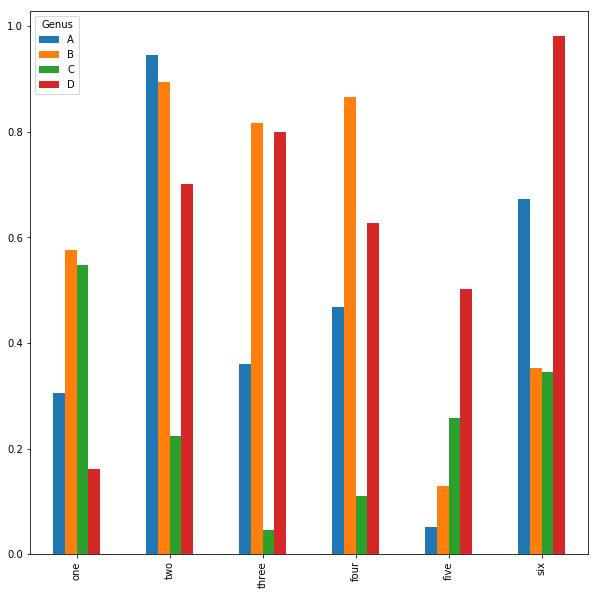

In [38]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [39]:
plt.figure()

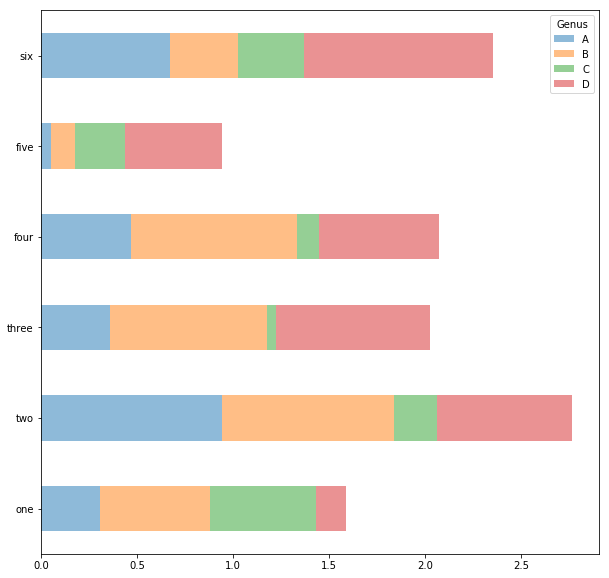

In [40]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [41]:
tips = pd.read_csv('ch08/tips.csv')
party_counts = pd.crosstab(tips.day, tips.size)
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.ix[:, 2:5]

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


In [42]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

party_pcts.plot(kind='bar', stacked=True)

TypeError: Empty 'DataFrame': no numeric data to plot

### Histograms and density plots

In [43]:
plt.figure()

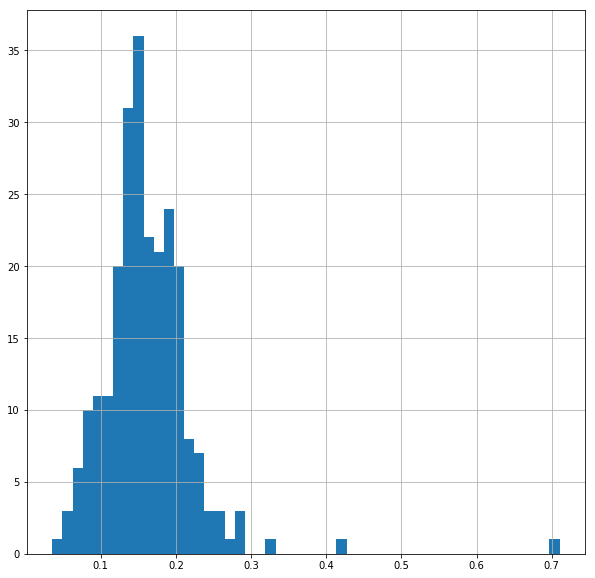

In [44]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [45]:
plt.figure()

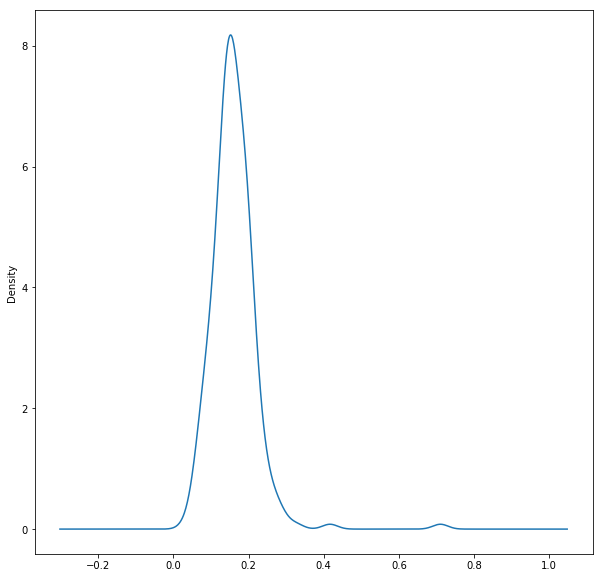

In [46]:
tips['tip_pct'].plot(kind='kde')


In [47]:
plt.figure()

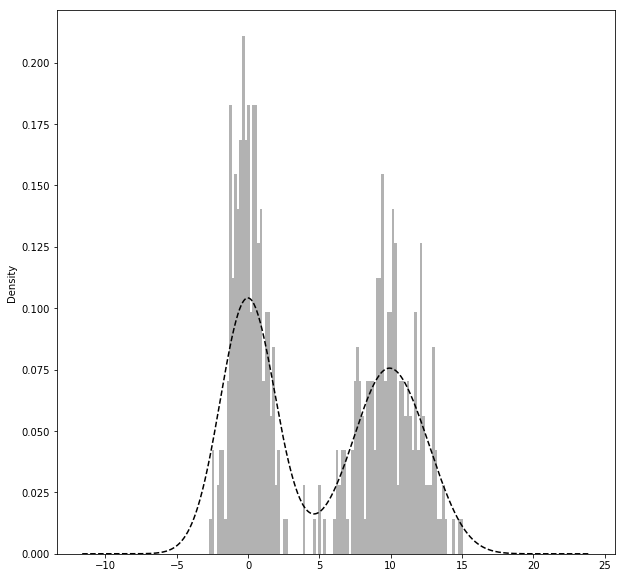

In [48]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### 散布図　Scatter plots

In [49]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [50]:
plt.figure()

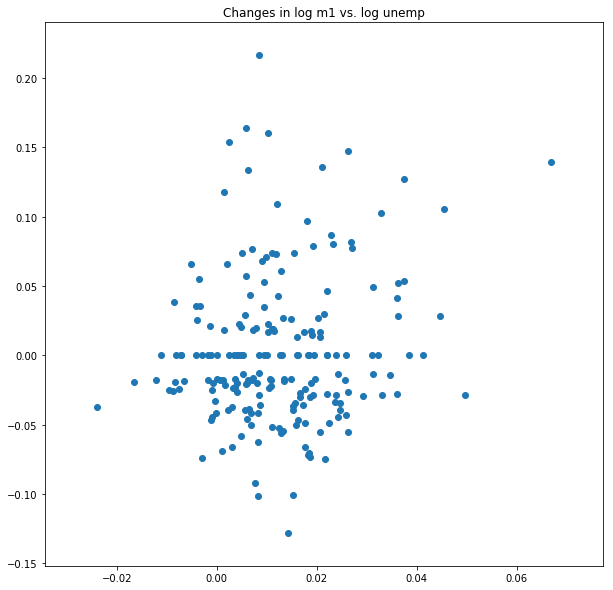

In [51]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1109472b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110f357b8>]], dtype=object)

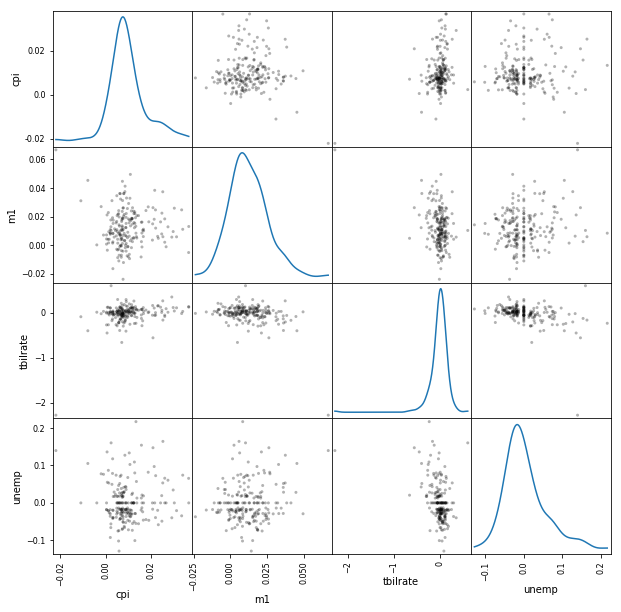

In [52]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## 地図のプロット

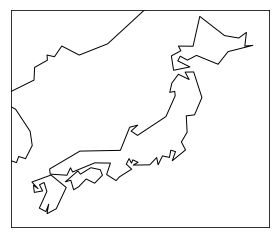

In [6]:
#参考
#http://www.mwsoft.jp/programming/numpy/plot_map.html
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 緯度経度で範囲を指定する
north = 46.
south = 30.
east = 147.
west = 128.

# 地図の表示
m = Basemap(llcrnrlat=south,urcrnrlat=north, llcrnrlon=west,urcrnrlon=east)
# 海岸線を引く
m.drawcoastlines() 

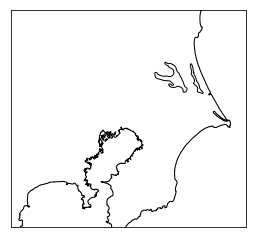

In [10]:
north = 36.5
south = 35.
east = 141.
west = 139.

# 地図の表示
m = Basemap(projection='merc', llcrnrlat=south,urcrnrlat=north, llcrnrlon=west,urcrnrlon=east, resolution='f')
m.drawcoastlines()
m.drawstates()

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (h

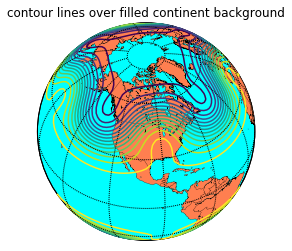

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


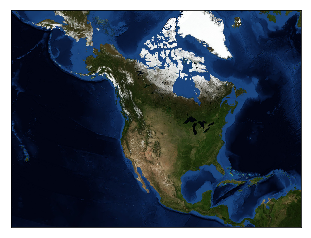

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

## 地図のプロット：ハイチ地震の災害データ

In [8]:
#ushihidiは非営利組織で、自然災害や地政学的な出来事に関する情報の、テキストメッセージを用いたクラウドソーシングを行ってる。
data = pd.read_csv('ch08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [9]:
#各行は事件が起きた場合に利用者からメッセージが送られてきたデータ。日付時刻、経度緯度。
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [10]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [11]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [12]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

In [13]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [14]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [15]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']

'Earthquake and aftershocks'

In [16]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [18]:
dummy_frame.iloc[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [19]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [20]:
data.iloc[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 327.3 KB


In [21]:
#conda install basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


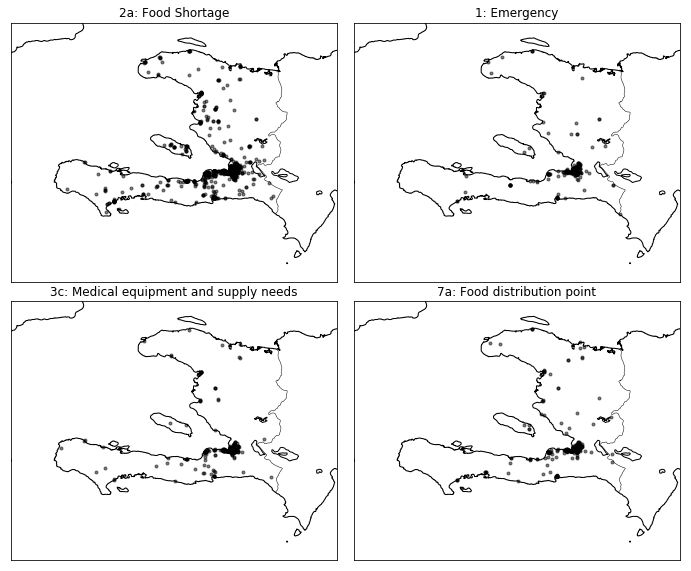

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

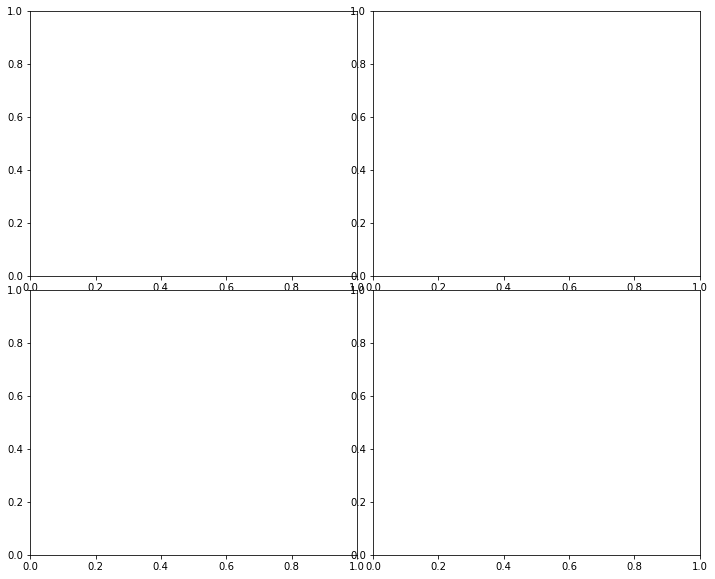

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        

In [26]:
make_plot()

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [25]:
shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

(1583,
 3,
 [-72.749246, 18.409952, 0.0, 0.0],
 [-71.973789, 18.7147105, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x10903ceb8>)

# seaborn

In [28]:
#matplotlibみたいなの。

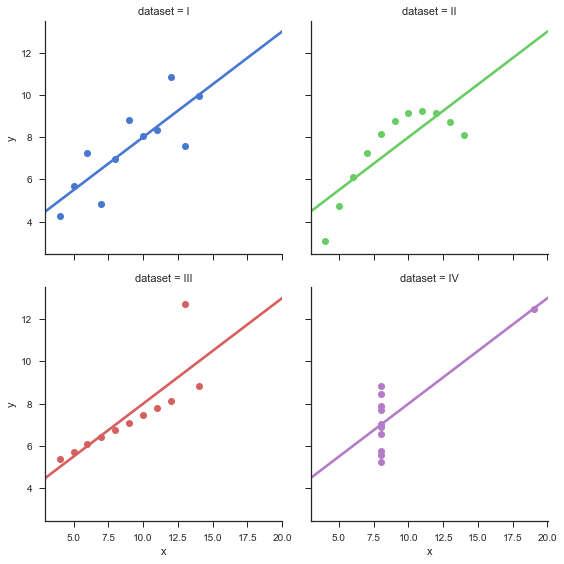

In [27]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

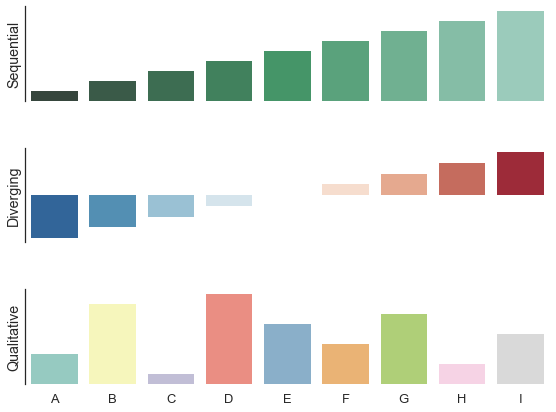

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(7)


# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHI"))
y1 = np.arange(1, 10)
sns.barplot(x, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5
sns.barplot(x, y2, palette="RdBu_r", ax=ax2)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, 9, replace=False)
sns.barplot(x, y3, palette="Set3", ax=ax3)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)

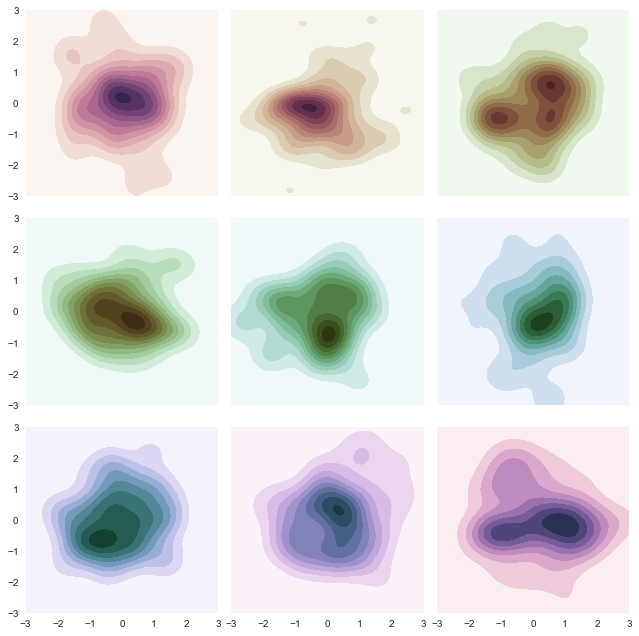

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

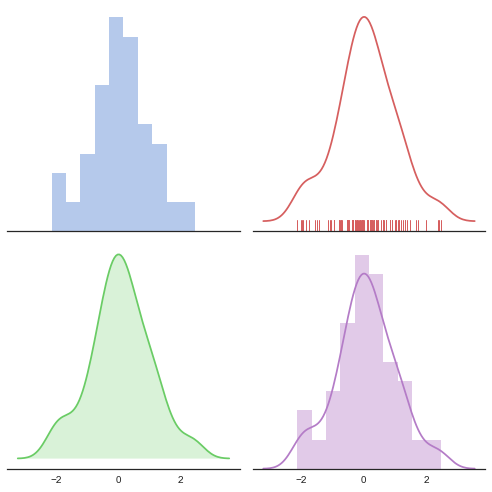

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

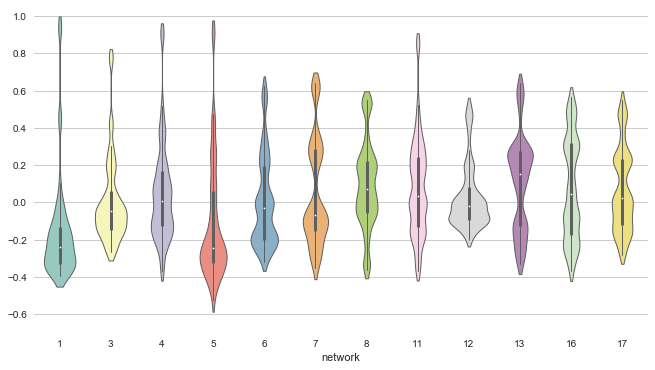

In [32]:
#バイオリンプロット
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

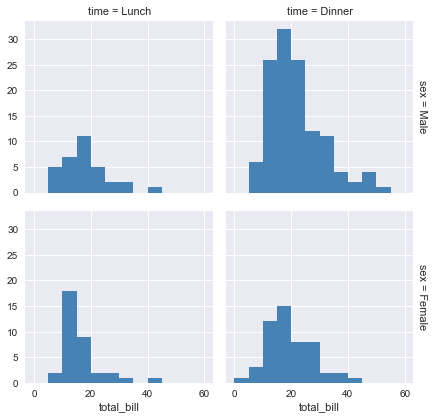

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)

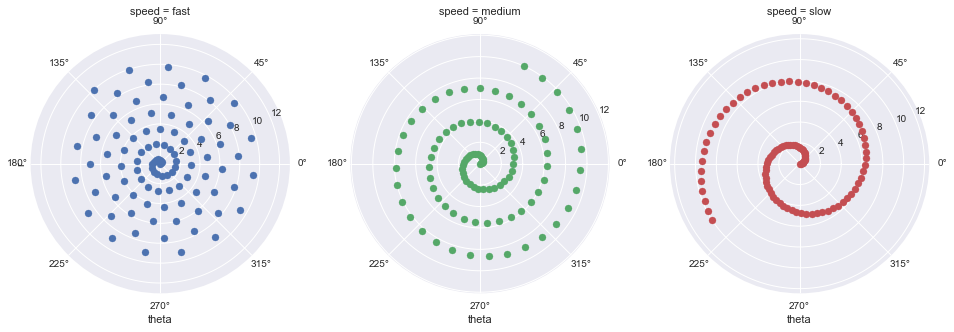

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), size=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(plt.scatter, "theta", "r")

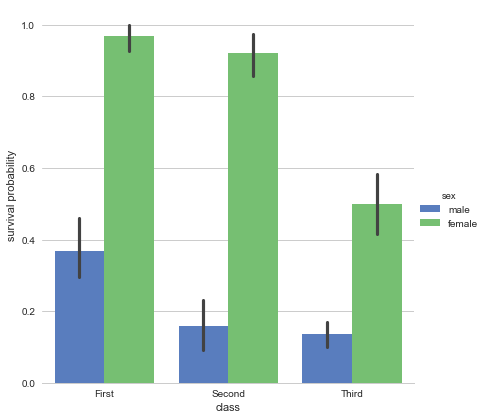

In [35]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="class", y="survived", hue="sex", data=titanic,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

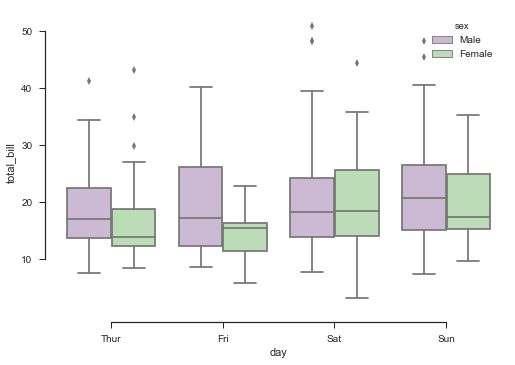

In [36]:
import seaborn as sns
sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

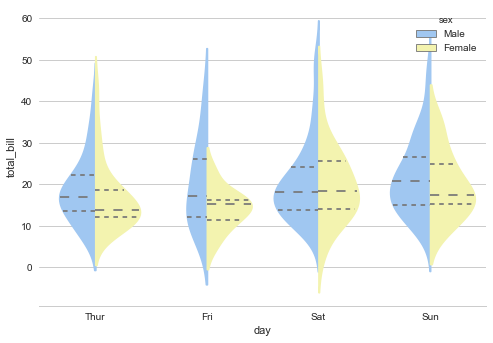

In [37]:
#グループされたバイオリンプロット
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

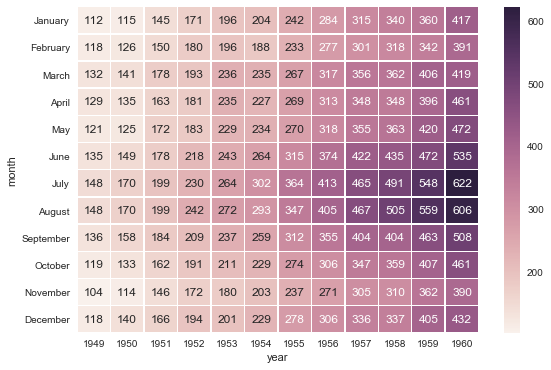

In [38]:
#注釈付きヒートマップ
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

# bokhe

# plotly

In [41]:
#クラウドベースの可視化ツール
#アカウント作らないといけない
#https://plot.ly/accounts/

In [7]:
import plotly.dashboard_objs as dashboard

import IPython.display
from IPython.display import Image


my_dboard = dashboard.Dashboard()
my_dboard.get_preview()
plotly.__version__

'2.0.11'

In [8]:
import sys,os,os.path
import plotly 
plotly.tools.set_credentials_file(username=os.environ['plotly_user'], api_key=os.environ['plotly_api'])

In [9]:
import plotly 
plotly.tools.set_config_file(world_readable=False,
                             sharing='private')


In [10]:
#エラーになってる。
import plotly.plotly as py
from plotly.graph_objs import *

trace0 = Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = Data([trace0, trace1])

py.iplot(data, filename = 'basic-line')

PlotlyRequestError: No message